# Der Einfluss von Covid auf die Klimahaltung in den Schweizer Medien
### Programmierprojekt: Analyse von Haltungsänderungen zum Klimawandel  
Von Kristina Horn & Zainab Aftab  
Betreut von: Simon Clematide  

## Einführung
In der Landschaft der modernen Medien spielen Zeitungen eine entscheidende Rolle bei der Formung der öffentlichen Meinung und des Diskurses, insbesondere zu kritischen Themen wie dem Klimawandel. Die COVID-19-Pandemie, eine Zeit beispielloser globaler Veränderungen, könnte potenziell beeinflusst haben, wie die Medien über solche entscheidende Themen diskutieren. Basierend auf der Studie von Rauchfleisch et al. (https://doi.org/10.1080/17524032.2021.1990978) besteht die Vermutung, dass die Pandemie die öffentliche Aufmerksamkeit vom Klimawandel in der Schweiz abgelenkt hat, da COVID-19 als ein deutlich existenzielleres Problem betrachtet wurde. Diese Datenanalyse zielt darauf ab, in den Kern dieses Phänomens einzutauchen und zu verstehen, wobei der Schwerpunkt auf der Berichterstattung der Schweizer Deutschsprachigen Presse über Klimafragen liegt.  

Unser Ziel ist es, die Entwicklung der klimabezogenen Haltungen in den Schweizer Deutschsprachigen Zeitungen in drei verschiedenen Perioden zu erkunden: Vor-COVID, während COVID und nach-COVID. Durch die Analyse dieser zeitlichen Segmente streben wir danach, potenzielle Veränderungen aufzudecken, die als Reaktion auf die globale Pandemie erfolgt sein könnten. 

## Datenquellen und Preprocessing:

Unsere Daten stammen aus der LiRI Swissdox-Datenbank, einer umfassenden Sammlung von Artikeln aus Schweizer Zeitungen. Dieser Datensatz erstreckt sich über mehrere Jahre und bietet eine vielfältige Grundlage zum Verständnis von Medientrends.  

Unser erster Schritt besteht darin, die Daten aus einer tsv-Datei zu laden, um sicherzustellen, dass wir eine solide Grundlage für unsere Analyse hatten. Die Daten wurden gründlich vorbereitet, wobei wir Filter angewendet haben, um uns auf Artikel zu konzentrieren, die für das Thema Klima relevant sind. Diese Schritte waren entscheidend, um den umfangreichen Datensatz in eine handhabbare und fokussierte Untergruppe für eine detaillierte Analyse zu verwandeln.


## Methodik

Unsere Anylse basiert auf einer Vielzahl von Python-Paketen, die uns ermöglichen, Einblicke in die Daten zu verschaffen. Die Datenverarbeitung und -exploration erfolgen mithilfe von pandas, wobei wir Daten laden, transformieren und explorative Visualisierungen durchführen, um Muster und Trends zu identifizieren. Um aussagekräftige Diagramme und Plots zu generieren, benötigen wir durchgehend matplotlib und seaborn. Die tsv-Datei von Swissdox@LiRI wurde netterweise von Dylan Massay in die von Dr. Manfred Klenner bereitgestellte Stancer-Pipeline eingegeben. Diese Pipeline analysiert jeden Satz eines Zeitungsartikels und bestimmt deren Stance.

### Forschungsfrage und Hypothesen
Unsere primäre Fragestellung lautet, **die Beziehung zwischen den politischen Neigungen von Publikationen und ihrer Haltung zu Klimafragen zu erforschen**. Wir untersuchen, ob politisch stärker orientierte Publikationen eine stärkere Voreingenommenheit in ihrer Klimaberichterstattung zeigen, insbesondere auch ob der Kontext der Pandemie diese beeinflusst hat.
Wir betrachten verschiedene Aspekte, wie die Häufigkeit von Klimaartikeln, die Tonalität der Berichterstattung und deren Änderungen im Verlaufe der Zeit in Abhängigkeit von der politischen Ausrichtung der Zeitung. 
Zusätzlich zu unserer Fragestellung haben wir 5 Hypothesen formuliert, um ein umfassendes Verständis der Dynamik zwischen politischen Neigungen und der Klimaberichterstattung zu gewinnen.

In [1]:
# Auskommentieren, falls diese Packages noch nicht installiert sind
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install numpy
# %pip install scipy
# %pip install scikit-learn
# %pip install tabulate

In [2]:
# Alle benötigten Packages importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from scipy.stats import chi2_contingency
from sklearn.metrics import cohen_kappa_score, accuracy_score, precision_recall_fscore_support
from tabulate import tabulate
from scipy.stats import mode
from datetime import datetime
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10
from bokeh.layouts import column


#  Datenaufbereitung

## Aussortieren unerwünschter Publikationen aus der Swissdox-Abfrage
Ein wesentlicher Schritt in der Vorbereitung unserer Daten ist das Aussortieren unerwünschter Publikationen aus der Swissdox-Abfrage. Da sich unsere Fragestellung auf politische Ausrichtungen von Publikationen bezieht, haben wir eine Auswahl getroffen, welche Publikationen genauer unter die Lupe genommen werden. Wir haben uns für 5 Publikationen mit den folgenden politischen Ausrichtungen entschieden:
- Links: WOZ
- Linksliberal: Tagesanzeiger
- Mitte: SRF
- Rechtsliberal: Neue Zürcher Zeitung, Luzerner Zeitung

https://positionpolitique.ch/politische-ausrichtung-der-schweizer-medien/

Ursprünglich wollten wir pro Ausrichtung (Links, Linksliberal, Mitte, Rechtsliberal, Rechts) eine Publikation wählen. Für Rechts hatten wir die WOZ ausgewählt, doch während der Datenanalyse haben wir festgestellt, dass diese Publikation erst seit 2021 in der Swissdox Datenbank getrackt wird. Daher mussten wir diese für unsere Analyse durch die Luzerner Zeitung ersetzen. Wir hätten gerne eine andere Rechts positionierte Publikation gewählt, waren jedoch limitiert durch die Verfügbaren Daten in der Swissdox Datenbank.

In [3]:
# Load the dataset
file_path = 'data/Queries/536k_query_woKlima.tsv'
df = pd.read_csv(file_path, sep='\t')

# List of desired medium codes
desired_medium_codes = ['TA', 'SRF', 'WOZ', 'NZZ', 'LUZ']

# Filter the DataFrame based on the medium codes
filtered_df_536k = df[df['medium_code'].isin(desired_medium_codes)]

# Save the filtered DataFrame to a new CSV file
# filtered_file_path = 'data/Queries/536k_query_woKlima_filtered.csv'
# filtered_df_536k.to_csv(filtered_file_path, index=False)

## Zusammenführen der 81k-Abfrage einschließlich Klimadaten mit der 81k-Datei mit Stancerdaten
Ein wichtiger Schritt in unserer Analyse ist das Zusammenführen des 81.000er Swissdox Queries, welches Klimadaten enthält, mit einer gleich großen Datei, die Stancerdaten zu den Artikeln beinhaltet. Diese Zusammenführung ermöglicht es uns, eine umfassendere Perspektive auf die Daten zu erhalten, indem wir sowohl thematische als auch haltungsbasierte Aspekte berücksichtigten.

In [4]:
# Load the TSV file
df_81k_stanced = pd.read_csv('data/Queries/81k_query_klima.tsv', sep='\t')

# Load the CSV file
df_relations = pd.read_csv('data/StancedData/81k_extract_relations_20240109.csv')

# Ensure the key columns are of the same data type
df_81k_stanced['content_id'] = df_81k_stanced['content_id'].astype(str)
df_relations['doc_id'] = df_relations['doc_id'].astype(str)

# Trim whitespace from the key columns
df_81k_stanced['content_id'] = df_81k_stanced['content_id'].str.strip()
df_relations['doc_id'] = df_relations['doc_id'].str.strip()

# Merge the DataFrames
merged_df = pd.merge(df_relations, df_81k_stanced, left_on='doc_id', right_on='content_id', how='left')
merged_df = merged_df.drop_duplicates()

# Save to file
# merged_df.to_csv('data/merged_81k.csv', index=False)

## Aussortieren unerwünschter Publikationen aus der zusammengeführten 81k-Datei (einschließlich Klima)
Nach dem Zusammenführen der Daten war ein weiterer Schritt das Aussortieren unerwünschter Publikationen. Wir haben 5 Publikationen der Schweizer Medienlandschaft ausgeducht, welche tendenziell unterschiedliche politische Ausrichtungen haben. Im spezifischen wollen wir den TagesAnzeiger, das SRF, die Wochenzeitung, die NZZ und die Luzerner Zeitung genauer unter die Lupe nehmen. Daher wird im nächsten Schritt eine erneute Filterung des zusammengeführten Datensatzes nach diesen Publikationen durchgeführt. Ausserdem wird die Spalte doc_id neu benannt, da sonst im weiteren Verlauf der Analyse Zugriffsprobleme mit dieser Spalte auftreten.

In [5]:
# Load the dataset
file_path = 'data/merged_81k.csv'
df_merged = pd.read_csv(file_path)

# List of desired medium codes
desired_medium_codes = ['TA', 'SRF', 'WOZ', 'NZZ', 'LUZ']

# Filter the DataFrame based on the medium codes
df_81k = df_merged[df_merged['medium_code'].isin(desired_medium_codes)]
df_81k = df_81k.rename(columns={'\ufeffdoc_id': 'doc_id'})

# Save the filtered DataFrame to a new CSV file
# filtered_file_path = 'data/merged_81k_filtered.csv'
# df_81k.to_csv(filtered_file_path, index=False)

## Erster Blick auf den gesamten Datensatz
## Anzahl der Artikel pro Publikation pro Jahr
### Analyse der Datei "536k_query_woKlima_filtered.csv"
Um einen ersten Eindruck und Überblick der Daten zu erhalten, lassen wir uns die Daten nach Anzahl der Artikel pro Publikation pro Jahr visualisieren. Hierzu nutzten wir die Datei "536k_query_woKlima_filtered.csv". Dieser Überblick ermöglicht es uns, Trends und Muster in der Berichterstattung über einen Zeitraum hinweg zu identifizieren. 

In [6]:
# Da wir vom Jahr 2023 nur 6 Monate Daten haben, filtern wir diese heraus
filtered_df_536k['pubtime'] = pd.to_datetime(filtered_df_536k['pubtime'], utc=True)
filtered_df_536k = filtered_df_536k.loc[:, :]  # Create a copy to avoid SettingWithCopyWarning
filtered_df_536k['year'] = filtered_df_536k['pubtime'].dt.year

filtered_df_536k_no_23 = filtered_df_536k[filtered_df_536k['year'] != 2023]

/var/folders/qh/2ztr0w4923q98mympxwnw2m00000gp/T/ipykernel_18313/3833943431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_536k['pubtime'] = pd.to_datetime(filtered_df_536k['pubtime'], utc=True)


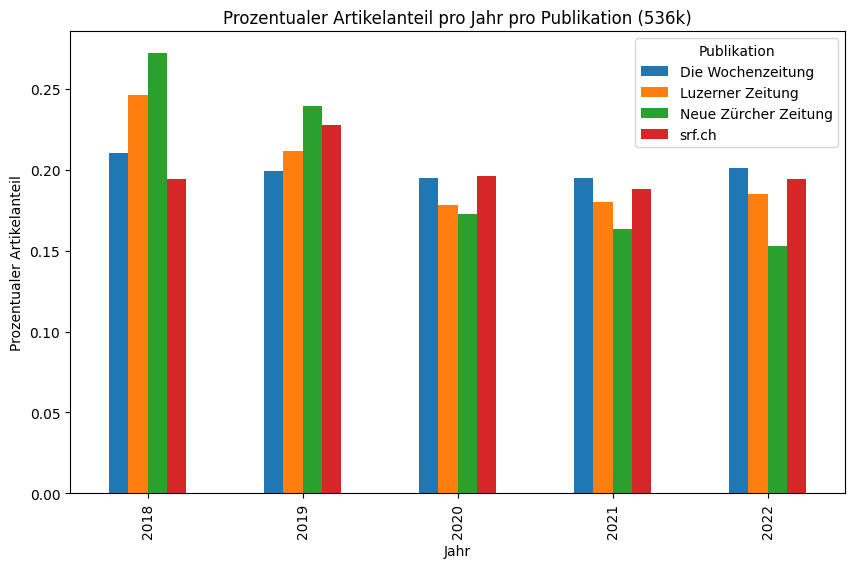

In [7]:
# Group by 'medium_name' and 'year', and count the number of articles
yearly_counts = filtered_df_536k_no_23.groupby(['medium_name', 'year']).size().reset_index(name='count')

# Calculate total articles per medium
total_counts = filtered_df_536k_no_23.groupby('medium_name')['id'].count().reset_index(name='total_count')

# Merge to get total counts in the same DataFrame
merged_df = pd.merge(yearly_counts, total_counts, on='medium_name')

# Calculate the proportion
merged_df['proportion'] = merged_df['count'] / merged_df['total_count']

# Pivot the data for plotting
pivot_df = merged_df.pivot(index='year', columns='medium_name', values='proportion')

# Plotting
ax = pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Prozentualer Artikelanteil pro Jahr pro Publikation (536k)')
plt.xlabel('Jahr')
plt.ylabel('Prozentualer Artikelanteil')

# Update the legend label
ax.legend(title='Publikation')

plt.show()


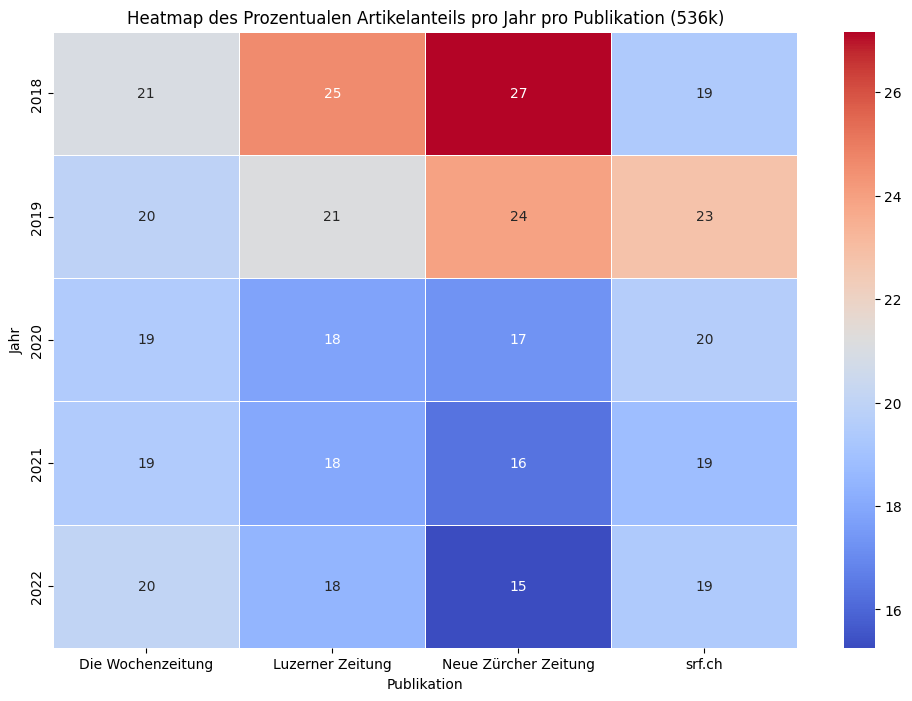

In [8]:
# Group by 'medium_name' and 'year', and count the number of articles
yearly_counts = filtered_df_536k_no_23.groupby(['medium_name', 'year']).size().reset_index(name='count')

# Calculate total articles per medium
total_counts = filtered_df_536k_no_23.groupby('medium_name')['id'].count().reset_index(name='total_count')

# Merge to get total counts in the same DataFrame
merged_df = pd.merge(yearly_counts, total_counts, on='medium_name')

# Calculate the proportion
merged_df['proportion'] = merged_df['count'] / merged_df['total_count'] * 100

# Pivot the data for the heatmap
pivot_df = merged_df.pivot(index='year', columns='medium_name', values='proportion')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap des Prozentualen Artikelanteils pro Jahr pro Publikation (536k)')
plt.ylabel('Jahr')
plt.xlabel('Publikation')
plt.show()

### Analyse der Datei "merged_81k_filtered.csv"

In [9]:
# Da wir vom Jahr 2023 nur 6 Monate Daten haben, filtern wir diese heraus
df_81k['pubtime'] = pd.to_datetime(df_81k['pubtime'], utc=True)
df_81k = df_81k.loc[:, :]  # Create a copy to avoid SettingWithCopyWarning
df_81k['year'] = df_81k['pubtime'].dt.year

df_81k_no_23 = df_81k[df_81k['year'] != 2023]

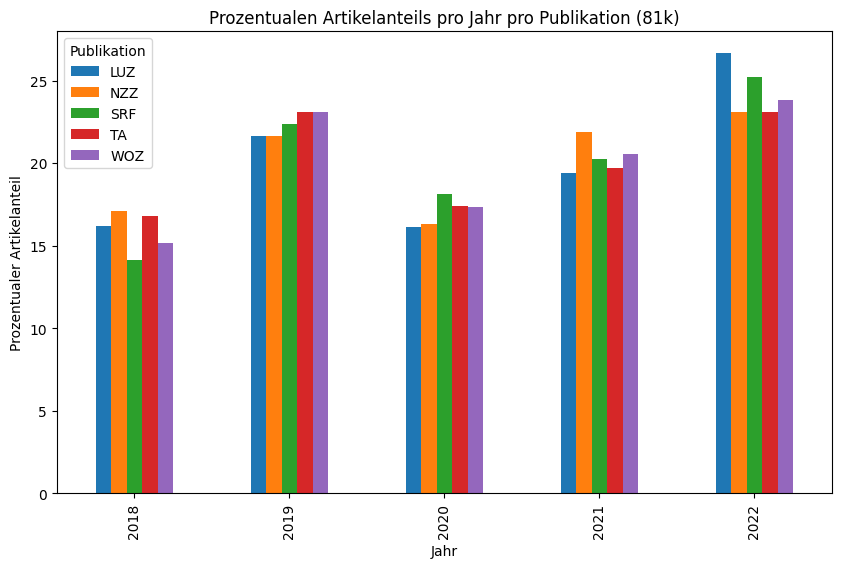

In [10]:
# Drop duplicates to keep only the first sentence of each article
unique_articles_df = df_81k_no_23.drop_duplicates(subset='doc_id')

# Group by 'medium_code' and 'year', and count the number of unique articles
yearly_counts = unique_articles_df.groupby(['medium_code', 'year']).size().reset_index(name='count')

# Calculate total articles per medium
total_counts = unique_articles_df.groupby('medium_code')['doc_id'].count().reset_index(name='total_count')

# Merge to get total counts in the same DataFrame
merged_df = pd.merge(yearly_counts, total_counts, on='medium_code')

# Calculate the proportion
merged_df['proportion'] = merged_df['count'] / merged_df['total_count'] * 100  # Multiplying by 100 to get percentage

# Pivot the data for plotting
pivot_df = merged_df.pivot(index='year', columns='medium_code', values='proportion')

# Plotting
ax = pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Prozentualen Artikelanteils pro Jahr pro Publikation (81k)')
plt.xlabel('Jahr')
plt.ylabel('Prozentualer Artikelanteil')

# Update the legend label
ax.legend(title='Publikation')

plt.show()

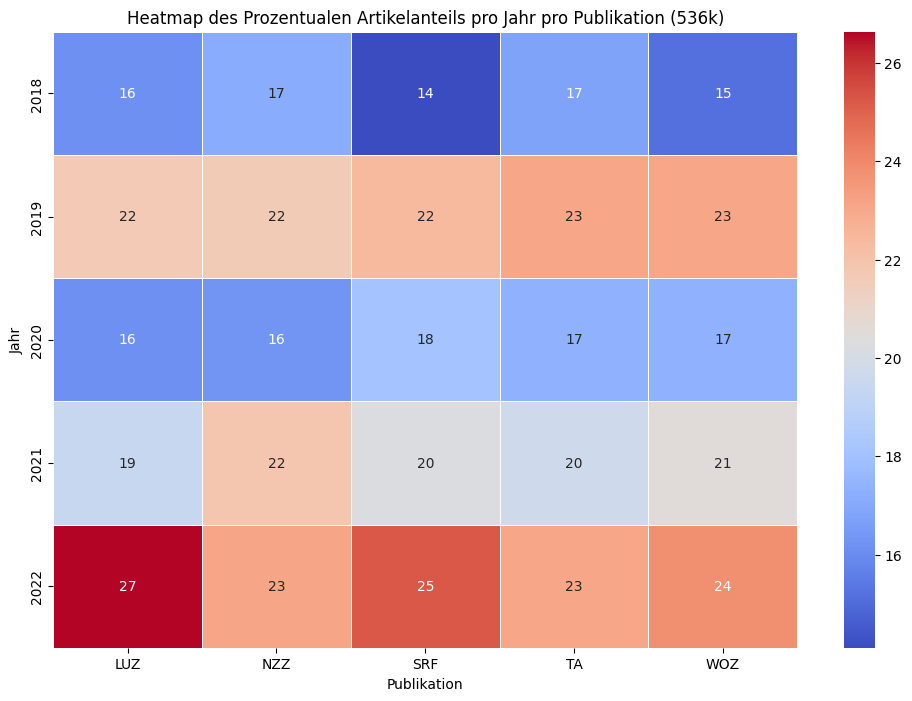

In [11]:
# Drop duplicates to keep only the first sentence of each article
unique_articles_df = df_81k_no_23.drop_duplicates(subset='doc_id')

# Group by 'medium_code' and 'year', and count the number of unique articles
yearly_counts = unique_articles_df.groupby(['medium_code', 'year']).size().reset_index(name='count')

# Calculate total articles per medium
total_counts = unique_articles_df.groupby('medium_code')['doc_id'].count().reset_index(name='total_count')

# Merge to get total counts in the same DataFrame
merged_df = pd.merge(yearly_counts, total_counts, on='medium_code')

# Calculate the proportion
merged_df['proportion'] = merged_df['count'] / merged_df['total_count'] * 100  # Multiplying by 100 to get percentage

# Pivot the data for the heatmap
pivot_df = merged_df.pivot(index='year', columns='medium_code', values='proportion')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap des Prozentualen Artikelanteils pro Jahr pro Publikation (536k)')
plt.ylabel('Jahr')
plt.xlabel('Publikation')
plt.show()

## Filterung des Dataframes für Zeilen, in denen entweder 'agr1' oder 'agr2' 'Klima' enthalten ist
Jetzt wird der Dataframe df_81k nach Subjekten (arg1) und Objekten (arg2) gefiltert, die das Wort 'Klima' enthalten. Der neue Dataframe wird unter klima_articles gespeichert.


In [12]:
# Filter the DataFrame for rows where either 'arg1' or 'arg2' contains 'Klima'
klima_articles = df_81k_no_23[(df_81k_no_23['arg1'].str.contains('Klima', case=False, na=False)) | 
                    (df_81k_no_23['arg2'].str.contains('Klima', case=False, na=False))]

# Select relevant columns
klima_articles = klima_articles[['doc_id', 'pubtime', 'medium_code', 'rel_type']]


### Heatmap-Visualisierung: Anzahl der 'Klima'-Artikel pro Jahr, Medium und Stance

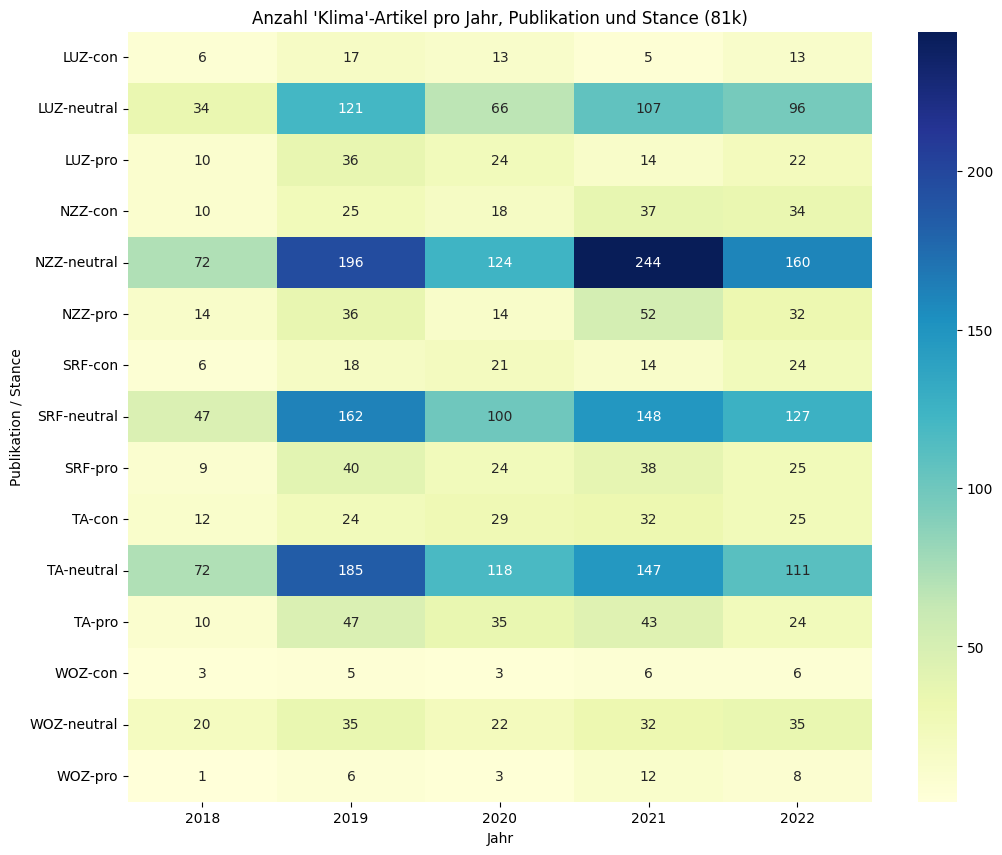

In [13]:
# Convert 'pubtime' to datetime and extract the year
klima_articles['pubtime'] = pd.to_datetime(klima_articles['pubtime'], format='%d.%m.%y %H:%M')
klima_articles['year'] = klima_articles['pubtime'].dt.year

# Group by year and medium_code, and count unique doc_id
klima_article_count = klima_articles.groupby(['year', 'medium_code', 'rel_type'])['doc_id'].nunique()

# Convert GroupBy object to DataFrame and reset the index
klima_article_count_df = klima_article_count.reset_index()
klima_article_count_df.columns = ['Year', 'Medium', 'Stance', 'Number of Articles']

# Pivot table for visualization
pivot_table = klima_article_count_df.pivot_table(index=['Medium', 'Stance'], columns='Year', values='Number of Articles', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Anzahl 'Klima'-Artikel pro Jahr, Publikation und Stance (81k)")
plt.ylabel("Publikation / Stance")
plt.xlabel("Jahr")
plt.show()

# Evaluation der Stancer-Pipeline:
Die Evaluation der Stancer-Pipeline ist wichtig, um festzustellen, wie verlässlich die Stancerdaten sind, die wir analysieren. Hierfür verwenden wir zunächst eine Stichprobe von 50 Sätzen aus unserem Datensatz. Dieses Sample mit 50 Sätzen ermöglicht es uns, verschiedene Metriken wie die Inter-Annotator Agreement (IAA) und andere Leistungskennzahlen zu berechnen, bevor wir mit der Analyse der Hauptstichprobe mit 300 Sätzen beginnen.
## Extraktion der Stichprobe mit 50 Sätzen

In [14]:
# df = pd.read_csv('data/merged_81k.csv', sep=',')
sample_df_50 = df_81k.sample(n=50, random_state=1) 

# Define the file path where you want to save the CSV
csv_file_path = 'data/annotated_50_samples.csv'

# Adding columns for annotation
sample_df_50['rel_type_correct'] = ''  # Column for marking if rel_type is correct
sample_df_50['corrected_rel_type'] = ''  # Column for the correct rel_type, if original is wrong

# Save the DataFrame to a CSV file
# sample_df_50.to_csv(csv_file_path, index=False, encoding='utf-8')

## IAA von den 50 Sample-Sätzen
Im ersten Schritt der Pipeline-Evaluation wird die IAA durchgeführt. Dafür extrahieren wir zufällig ausgewählte Sätze und speichern sie in einem separaten Dataframe ab. Ziel ist es, die Übereinstimmung zwischen zwei Annotierer hinsichtlich der Relationstypen zu bewerten. Die Annotationen werden auf Basis von zwei zusätzliche Spalten überprüft: rel_type_correct und corrected_rel_type. Diese geben an, ob der Stance korrekt ist, und bieten die Möglichkeit, einen korrigierten Stance anzugeben, falls erforderlich. Der Cohen's Kappa-Wert wird schließlich berechnet, um die Übereinstimmung zwischen den Annotierer zu quantifizieren. Ein höherer Cohen's Kappa-Wert deutet auf eine höhere Übereinstimmung hin und stärkt die Zuverlässigkeit der annotierten Daten. Diese IAA-Analyse stärkt die Zuverlässigkeit unserer Erkenntnisse, indem sie sicherstellt, dass die Annotationen konsistent sind.

In [15]:
# Load the files
file_annotator1 = 'data/IAA_annotations/annotated_50_sample_ZA.xlsx'
file_annotator2 = 'data/IAA_annotations/annotated_50_samples_kfh.xlsx'

df_annotator1 = pd.read_excel(file_annotator1)
df_annotator2 = pd.read_excel(file_annotator2)

# Assuming 'doc_id' or a similar unique identifier is present to align rows
df_annotator1 = df_annotator1.sort_values('doc_id').reset_index(drop=True)
df_annotator2 = df_annotator2.sort_values('doc_id').reset_index(drop=True)

# Preprocess to create a final stance column for each annotator
df_annotator1['final_rel_type'] = df_annotator1.apply(
    lambda x: x['rel_type'] if x['rel_type_correct'] == 'cor' else x['corrected_rel_type'], axis=1)
df_annotator2['final_rel_type'] = df_annotator2.apply(
    lambda x: x['rel_type'] if x['rel_type_correct'] == 'cor' else x['corrected_rel_type'], axis=1)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(df_annotator1['final_rel_type'], df_annotator2['final_rel_type'])

print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.7275204359673024


Ein Cohen's Kappa von 0.73 weist auf eine wesentliche Übereinstimmung zwischen den Annotatoren hin. Dies legt nahe, dass es ein signifikantes Maß an Übereinstimmung gibt, dass über das hinausgeht, was allein durch Zufall zu erwarten wäre. Daher fahren wir mit der Annotation der Hauptstichprobe von 300 Sätzen fort.

## Extraction der Hauptstichprobe mit 300 Sätzen
Für die Hauptstichprobe extrahieren wir 20 zufällige Sätze pro Relationstyp pro Medium aus unserem 81k Datensatz. 

In [16]:
# Extracting unique values for 'medium_name' and 'rel_type' from the DataFrame
unique_media_names = df_81k['medium_name'].unique()
unique_rel_types = df_81k['rel_type'].unique()

# Initializing an empty DataFrame to hold the combined samples for the new sampling strategy
new_combined_samples = pd.DataFrame()

# Looping through each medium
for medium in unique_media_names:
    # Initializing a DataFrame to hold samples for the current medium
    medium_samples = pd.DataFrame()

    # Looping through each rel_type
    for rel_type in unique_rel_types:
        # Filter the DataFrame for the current rel_type and medium
        filtered_df = df_81k[(df_81k['rel_type'] == rel_type) & (df_81k['medium_name'] == medium)]
        
        # Sample 20 sentences or all available if less than 20
        sampled_sentences = filtered_df.sample(n=min(20, len(filtered_df)), random_state=1)

        # Append the samples to the medium DataFrame
        medium_samples = pd.concat([medium_samples, sampled_sentences], ignore_index=True)

    # Append the medium samples to the combined DataFrame
    new_combined_samples = pd.concat([new_combined_samples, medium_samples], ignore_index=True)

# Adding columns for annotation
new_combined_samples['rel_type_correct'] = ''  # Column for marking if rel_type is correct
new_combined_samples['corrected_rel_type'] = ''  # Column for the correct rel_type, if original is wrong

# Define the file path where you want to save the CSV
# csv_file_path = 'data/annotated_300_samples.csv'
# Save the DataFrame to a CSV file
# new_combined_samples.to_csv(csv_file_path, index=False, encoding='utf-8')

## Accuracy, Precision, Recall und F1-Score:

Accuracy, Precision, Recall und F1-Score sind Evaluationsmetriken, die in der Klassifikation verwendet werden, um die Leistung eines Modells zu bewerten. Accuracy ist ein allgemeines Maß für die Gesamtgenauigkeit des Modells, Precision konzentriert sich auf die Genauigkeit der positiven Vorhersagen, Recall auf die Fähigkeit des Modells, alle positiven Fälle zu erkennen, und der F1-Score bietet eine ausgewogene Einschätzung unter Berücksichtigung von Precision und Recall. Je nach Anwendungsfall kann man entscheiden, welche dieser Metriken am wichtigsten ist.

In [17]:
# Load the annotated data file
file_path = 'data/IAA_annotations/annotated_300_samples_filtered_ZA_KH.xlsx'
df_annotated_300_filtered= pd.read_excel(file_path)

# Create a new column for the final 'true' label
df_annotated_300_filtered['final_true_label'] = df_annotated_300_filtered.apply(
    lambda x: x['rel_type'] if x['rel_type_correct'] == 'cor' else x['corrected_rel_type'], axis=1)

# Stancer's predictions column (assuming it's named 'rel_type')
stancer_predictions = df_annotated_300_filtered['rel_type']

# Calculate accuracy
accuracy = accuracy_score(df_annotated_300_filtered['final_true_label'], stancer_predictions)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(df_annotated_300_filtered['final_true_label'], stancer_predictions, average=None, labels=['pro', 'con', 'neutral'])

# Print results
for label, p, r, f in zip(['pro', 'con', 'neutral'], precision, recall, f1):
    print(f"{label} - Precision: {p}, Recall: {r}, F1 Score: {f}")

Accuracy: 0.79
pro - Precision: 0.67, Recall: 0.8933333333333333, F1 Score: 0.7657142857142857
con - Precision: 0.77, Recall: 0.927710843373494, F1 Score: 0.8415300546448088
neutral - Precision: 0.93, Recall: 0.6595744680851063, F1 Score: 0.7717842323651452


### Visualisierung der Scores

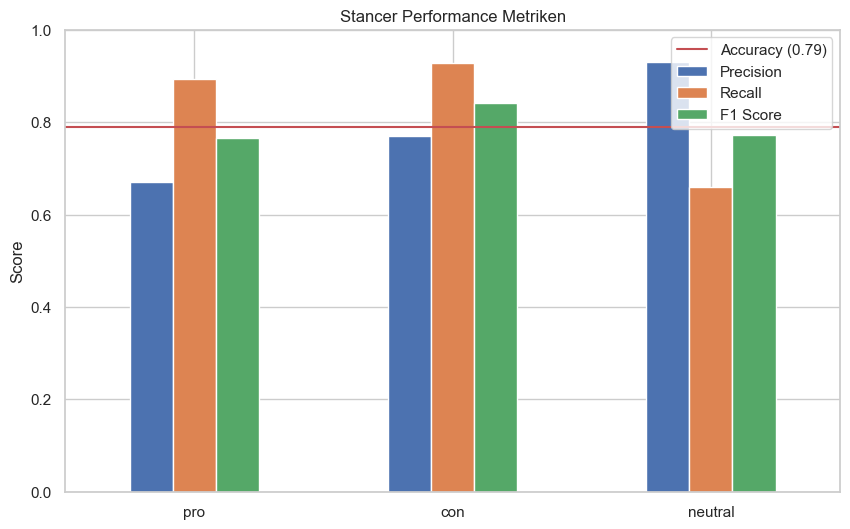

In [18]:
# Create a new column for the final 'true' label
df_annotated_300_filtered['final_true_label'] = df_annotated_300_filtered.apply(
    lambda x: x['rel_type'] if x['rel_type_correct'] == 'cor' else x['corrected_rel_type'], axis=1)

# Stancer's predictions column
stancer_predictions = df_annotated_300_filtered['rel_type']

# Calculate accuracy
accuracy = accuracy_score(df_annotated_300_filtered['final_true_label'], stancer_predictions)

# Calculate precision, recall, and F1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(df_annotated_300_filtered['final_true_label'], stancer_predictions, average=None, labels=['pro', 'con', 'neutral'])

# Prepare data for bar plot
metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1 Score': f1}, index=['pro', 'con', 'neutral'])

# Plotting
sns.set(style="whitegrid")
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Stancer Performance Metriken')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.axhline(y=accuracy, color='r', linestyle='-', label=f'Accuracy ({accuracy:.2f})')
plt.legend()
plt.show()

### Ergebnisse und Bedeutung

Die Genauigkeit beträgt 0.79, was darauf hinweist, dass etwa 79% der Vorhersagen korrekt sind. Dieser Wert ist recht gut, aber es ist wichtig, auch die anderen Metriken zu berücksichtigen.
Die Precision von pro ist 0.67. Das zeigt, dass von allen als "pro" vorhergesagten Fällen etwa 67% tatsächlich positiv sind. Uns erscheint das eher ungenau. Der Recall von 0.89 zeigt jedoch, dass etwa 89% der tatsächlich positiven Fälle korrekt vorhergesagt wurden. Heisst der Grossteil der positiven Stances konnte getrackt werden. Wir vermuten, dass der Stancer gewissen lexikalischen Nuancen einen höheren Wert zuspricht in Fällen, wo ein menschlicher Annotierer mit Weltwissen und non-lexikalischem Kontext eine ander Einstufung machen würde. Das muss perse nicht negativ sein, da eine zu "neutraler" Stancer-Pipeline viel zu wenige pro/con Stances identifizieren würde. 

Ausserdem könnte dieses Ergebnis auch durch unsere Daten beeinflusst sein. Zeitungsartikel haben zum Teil sehr verschachtelte Sätze. Ausserdem sind Medienberichte im Schnitt negativer als andere Textsammlungen, daher könnte auch die höheren Metriken bei den contra-stances stammen. 


### Beispielsätze, die bei der Annotation aufgefallen sind

- Bundesrätin Simonetta Sommaruga kündigte einen Aktionsplan an.  
    rel_type: con -> besser: neutral  
    Die falsche Klassifikation ist aus unserer Sicht passiert, da die Stancer-Pipeline nur "kündigte" mit einberechnet hat, jedoch die Vorsilbe "an" übersehen hat. Dies macht es zu einer neutralen Aussage.  

- Das Ziel : Die weitere Isolation Russlands soll weder den US-Verbrauchern schaden noch die globale Versorgung beeinträchtigen.    
    rel_type: con -> besser: neutral   
    Der Stancer hat hier scheinbar das "weder noch" ignoriert und den Fokus nur auf das "schaden" gelegt.  

- An jenem Morgen Mitte April verliess Ana Patricia Non ihre Wohnung in der Maginhawa Street in Quezon City , die Teil der Metropolregion Manila ist und zur sogenannten National Capital Region gehört.  
    rel_type: con -> besser: neutral  
    Hier hat der Stancer das Verb "verlassen" falsch interpretiert. Er konnte den Kontext des Wohnungsverlassen nicht einfangen und bewertete es so negativ, obwohl das eine komplett neutrale Handlung ist.  



# Datenanalyse

## Hypothese 1: Je stärker die politische Richtung einer Publikation, desto mehr +/- Stances gibt es im Vergleich zu neutralen.
### Tabelle: Verhältnis pro/contra zu neutral von 2018-2023

                      Sum pro/con  Sum neutral
medium_name                                   
Die Wochenzeitung            1360         5004
Luzerner Zeitung             6354        21773
Neue Zürcher Zeitung        12214        41264
Tages-Anzeiger               7553        23856
srf.ch                      10266        27463


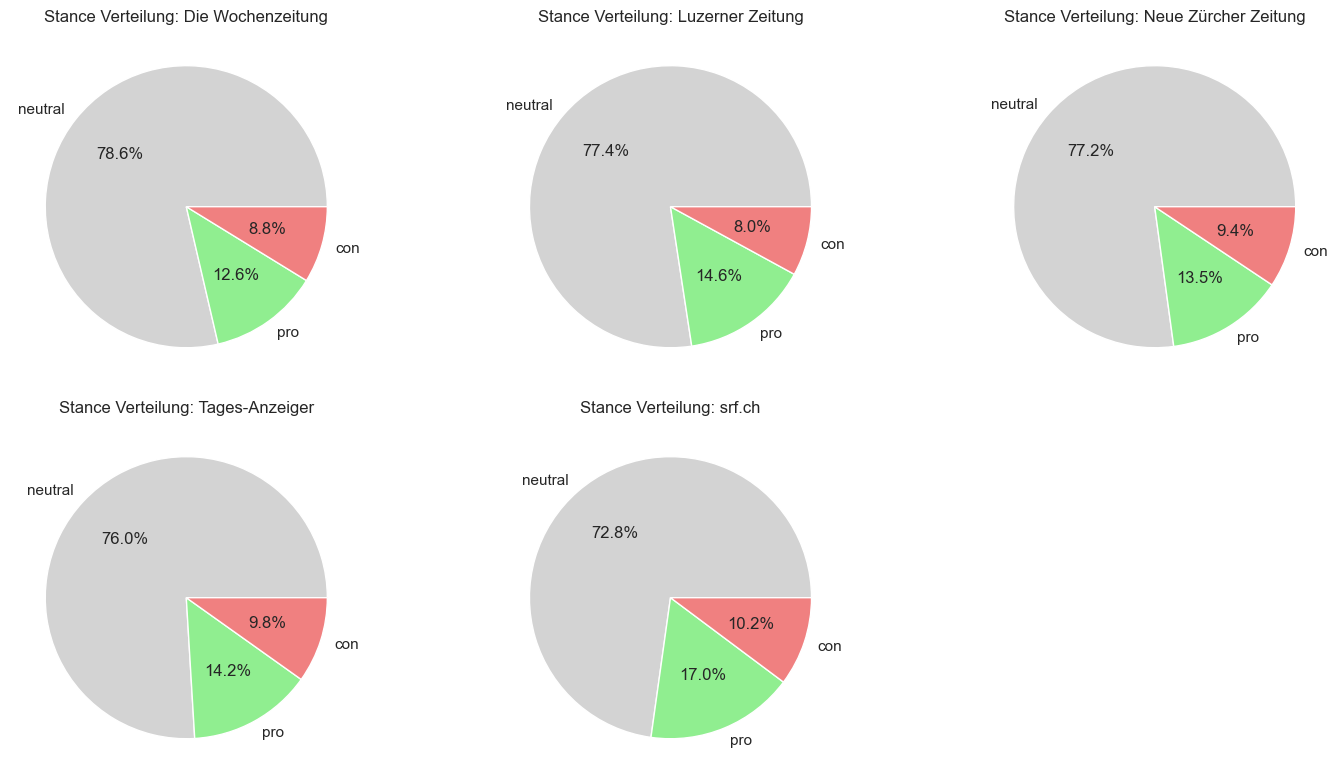

In [19]:
# Calculation of the ratios
non_neutral_df = df_81k[df_81k['rel_type'].isin(['pro', 'con'])]
neutral_df = df_81k[df_81k['rel_type'].isin(['neutral'])]

# Group by medium_name
ratio_non_neutral = non_neutral_df.groupby('medium_name')['rel_type'].apply(lambda x: x.eq('pro').sum() + x.eq('con').sum()).to_frame()
ratio_neutral = neutral_df.groupby('medium_name')['rel_type'].apply(lambda x: x.eq('neutral').sum()).to_frame()

ratio = ratio_neutral['rel_type'] / ratio_non_neutral['rel_type']

media_stances = pd.merge(pd.merge(ratio_non_neutral, ratio_neutral, on='medium_name'), ratio, on='medium_name')
media_stances = media_stances.rename(columns={'rel_type_x': 'Sum pro/con', 'rel_type_y': 'Sum neutral', 'rel_type': 'Ratio pro/con to neutral'})
media_stances['Ratio pro/con to neutral'] = media_stances['Ratio pro/con to neutral'].round(4)

def add_prefix(value):
    return f'1:{value}'

media_stances['Ratio pro/con to neutral'] = media_stances['Ratio pro/con to neutral'].apply(add_prefix)
# Remove the 'Ratio pro/con to neutral' column
media_stances = media_stances[['Sum pro/con', 'Sum neutral']]

print(media_stances)

# Filter data for 'pro', 'con', 'neutral'
stances_df = df_81k[df_81k['rel_type'].isin(['pro', 'con', 'neutral'])]

# Plotting all pie charts in one picture
num_publications = len(media_stances)
num_rows = 2
num_cols = num_publications // num_rows + num_publications % num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array to handle both one row and multiple rows cases
axes = axes.flatten()

for i, (index, row) in enumerate(media_stances.iterrows()):
    publication_data = stances_df[stances_df['medium_name'] == index]['rel_type'].value_counts()

    publication_data.plot(kind='pie', autopct='%1.1f%%', colors=['lightgrey', 'lightgreen', 'lightcoral'], ax=axes[i])
    axes[i].set_title(f'Stance Verteilung: {index}')
    axes[i].set_ylabel('')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Ergebnisse
Die Analyse zeigt, das unsere erste Hypothese sich nicht bestätigt. Das SRF hat nur 72.8% neutrale Stances wohingegen alle anderen Publikationen 76% oder mehr neutrale Stances haben. Würde unsere Hypothese stimmen, müsste das SRF jedoch mehr neutrale Stances haben, da das SRF mittig positioniert ist. Was jedoch auffällt ist, dass das SRF 3-5% mehr pro Stances aufweist als die anderen Publikationen.

## Hypothese 2: Die Rubrik ‘Meinungen’ hat stärkere Stances als alle anderen Zeitungsartikel. 

In [20]:
# Function to identify opinions based on 'rubric'
def find_opinions(column):
    try:
        # Convert to string if not already
        column_str = str(column)
        pattern = re.compile(r'\bMeinung\w*\b', flags=re.IGNORECASE)
        return bool(pattern.search(column_str))
    except Exception as e:
        return False

# Create a new dataframe for 'opinions_df'
df_copy = df_81k.copy()
df_copy['opinions'] = df_copy['rubric'].apply(find_opinions)
opinions_df = df_copy[df_copy['opinions']].copy()
opinions_df['rubric'] = 'Opinions'

# Create copies of DataFrame slices to avoid SettingWithCopyWarning
not_opinions_df = df_copy[~df_copy['opinions']].copy()
not_opinions_df['rubric'] = 'Not Opinions'

# Concatenate the DataFrames
new_df = pd.concat([opinions_df, not_opinions_df], ignore_index=True)

# Group by 'medium_name' and 'rubric', then count occurrences
rubric_counts = new_df.groupby(['medium_name', 'rubric'])['rel_type'].value_counts().unstack(fill_value=0)

# Calculate ratios
ratio_non_opinion = rubric_counts['neutral']
ratio_opinion = rubric_counts['pro'] + rubric_counts['con']
ratio = ratio_non_opinion / ratio_opinion

# Create a new DataFrame for ratios
ratios_df = pd.DataFrame({
    'Sum neutral': ratio_non_opinion,
    'Sum pro/con': ratio_opinion,
    'Ratio pro/con to neutral': ratio.round(4)
}).reset_index()

# Apply prefix to 'Ratio pro/con to neutral'
ratios_df['Ratio pro/con to neutral'] = ratios_df['Ratio pro/con to neutral'].apply(lambda x: f'1:{x}')

# Display the table for each medium 
for medium, medium_group in ratios_df.groupby('medium_name'):
    print(f"\nTable for {medium}:\n")
    table = tabulate(medium_group.drop(columns='medium_name'), headers='keys', tablefmt='pretty', showindex=False)
    print(table)


Table for Die Wochenzeitung:

+--------------+-------------+-------------+--------------------------+
|    rubric    | Sum neutral | Sum pro/con | Ratio pro/con to neutral |
+--------------+-------------+-------------+--------------------------+
| Not Opinions |    5004     |    1360     |         1:3.6794         |
+--------------+-------------+-------------+--------------------------+

Table for Luzerner Zeitung:

+--------------+-------------+-------------+--------------------------+
|    rubric    | Sum neutral | Sum pro/con | Ratio pro/con to neutral |
+--------------+-------------+-------------+--------------------------+
| Not Opinions |    21430    |    6267     |         1:3.4195         |
|   Opinions   |     343     |     87      |         1:3.9425         |
+--------------+-------------+-------------+--------------------------+

Table for Neue Zürcher Zeitung:

+--------------+-------------+-------------+--------------------------+
|    rubric    | Sum neutral | Sum pro/co

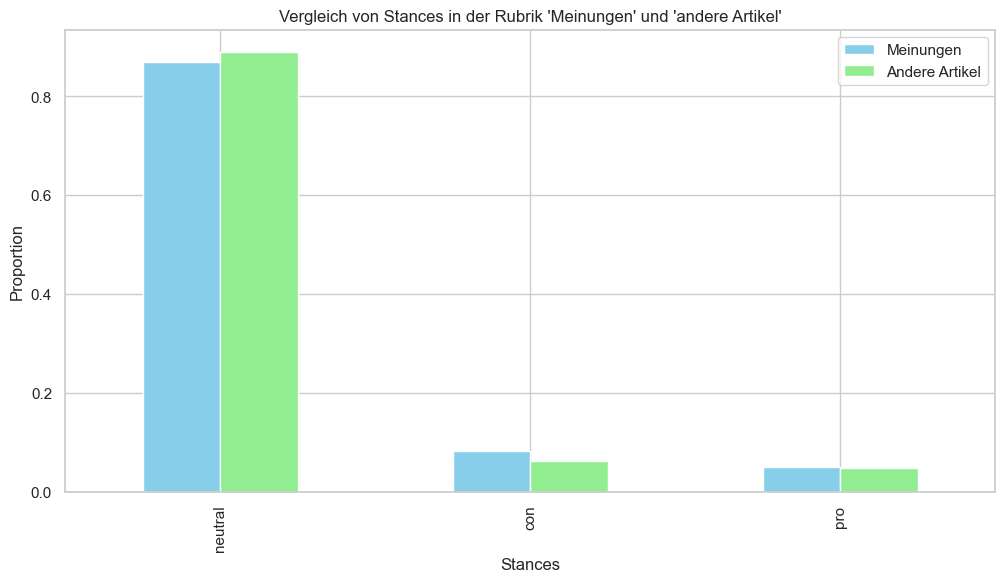

In [29]:
# Filter for Meinungen and other categories
meinungen_df = df_81k[df_81k['rubric'] == 'Meinungen']
other_articles_df = df_81k[df_81k['rubric'] != 'Meinungen']

# Determine the predominant stance for each article
predominant_meinungen = meinungen_df.groupby('doc_id')['rel_type'].agg(lambda x: pd.Series.mode(x)[0])
predominant_other = other_articles_df.groupby('doc_id')['rel_type'].agg(lambda x: pd.Series.mode(x)[0])

# Count the occurrences of each predominant stance
meinungen_stances = predominant_meinungen.value_counts()
other_articles_stances = predominant_other.value_counts()

# Normalize the counts for comparison (optional)
meinungen_stances = meinungen_stances / meinungen_stances.sum()
other_articles_stances = other_articles_stances / other_articles_stances.sum()

# Combine into a single DataFrame for plotting
combined_stances = pd.DataFrame({'Meinungen': meinungen_stances, 'Andere Artikel': other_articles_stances})
combined_stances = combined_stances.fillna(0) # Fill NaN values with 0

# Plotting
combined_stances.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen'])
plt.title("Vergleich von Stances in der Rubrik 'Meinungen' und 'andere Artikel'")
plt.xlabel('Stances')
plt.ylabel('Proportion')
plt.show()

### Ergebnisse
Die Tabellen geben einen Einblick in die Anzahl der neutralen und meinungsbetonten Daten, sowie das Verhältnis von Sätzen aus Meinungsartikeln zu Sätzen aus allen anderen Zeitungsartikeln:  
Da das SRF keine Meinungsrubkriken für das Thema 'Klima' aufweist und die Weltwoche gar keine Rubriknamen angibt, können deren Tabellen nicht untersucht werden. Die anderen Tabellen als auch die Visualisierung bestätigen, dass die Rubrik 'Meinungen' stärkere Stances aufweist. Die Grafik verdeutlicht, dass negative Stances häufiger auftreten als positive. Meistens sind Meinungsartikel kontrovers und zielen darauf ab, Diskussionen anzuregen, was dementsprechend unsere zweite Hypothese vorläufig bestätigt.

## Hypothese 3: Das SRF hat mehr neutrale als pos./ neg. Stances.

In [22]:
medium = 'SRF'
srf_df = df_81k[df_81k['medium_code'] == medium]
srf_not_neutral = df_81k[(df_81k['rel_type'] == 'pro') | (df_81k['rel_type']== 'con')].shape[0]
srf_neutral = df_81k[df_81k['rel_type'] == 'neutral'].shape[0]

if srf_neutral > srf_not_neutral:
    answer = 'Ja, hat es. '
else:
    answer = 'Nein, hat es nicht. '

print(f'{answer}{medium} hat {srf_not_neutral} nicht-neutrale Stances und {srf_neutral} neutral Stances.')

Ja, hat es. SRF hat 37747 nicht-neutrale Stances und 119360 neutral Stances.


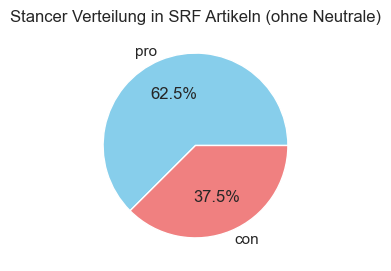

In [23]:
# Filter data for SRF without 'neutral'
srf_not_neutral_df = df_81k[(df_81k['medium_code'] == 'SRF') & (df_81k['rel_type'] != 'neutral')]

# Calculate the counts for 'pro' and 'con'
stance_counts = srf_not_neutral_df['rel_type'].value_counts()

# Plotting
plt.figure(figsize=(3, 3))

# Pie chart for pro/con distribution without 'neutral'
stance_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title(f'Stancer Verteilung in {medium} Artikeln (ohne Neutrale)')
plt.ylabel('')

plt.show()

### Ergebnisse
Das SRF hat mehr neutrale als pro/con Stances. Das bestätigt unsere Annahme. Ausserdem sehen wir auch hier erneut den grossen Anteil von positiven Stances beim SRF. 

## Hypothesse 4: Die Pandemie hat die Stances zum Thema Klima beeinflusst.

In [24]:
df_h4 = df_81k

/var/folders/qh/2ztr0w4923q98mympxwnw2m00000gp/T/ipykernel_18313/933138790.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_h4['year_quarter'] = df_h4['pubtime'].dt.to_period('Q')


<Figure size 1200x600 with 0 Axes>

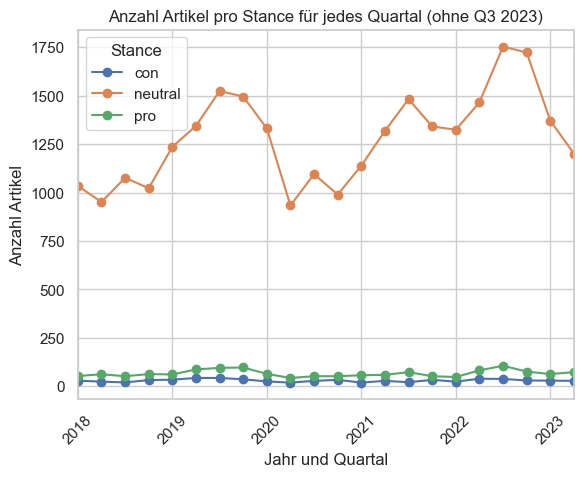

In [25]:
# Convert 'pubtime' to datetime and extract year and quarter
df_h4['pubtime'] = pd.to_datetime(df_h4['pubtime'])
df_h4['year_quarter'] = df_h4['pubtime'].dt.to_period('Q')

# Function to get the mode, or return 'neutral' in case of a tie
def get_mode(series):
    value_counts = series.value_counts()
    max_count = value_counts.max()
    
    # Check for a tie, return 'neutral' if there is a tie
    if (value_counts == max_count).sum() == 1:
        return value_counts.idxmax()
    else:
        return 'neutral'

# Group by article and get the mode of rel_type
article_stance = df_h4.groupby('doc_id')['rel_type'].apply(get_mode).reset_index(name='stance')

# Merge with the original df to get the year_quarter information
merged_df = pd.merge(df_h4[['doc_id', 'year_quarter']].drop_duplicates(), article_stance, on='doc_id')

# Exclude Q3 of 2023
merged_df_filtered = merged_df[~((merged_df['year_quarter'].astype(str) == '2023Q3'))]

# Count the number of articles by stance and year_quarter
stance_counts = merged_df_filtered.groupby(['year_quarter', 'stance']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
stance_counts.plot(kind='line', marker='o')
plt.title('Anzahl Artikel pro Stance für jedes Quartal (ohne Q3 2023)')
plt.xlabel('Jahr und Quartal')
plt.ylabel('Anzahl Artikel')
plt.legend(title='Stance')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Ergebnisse
Unsere Hypothese bestätigt sich nicht. Man sieht zwar grössere Schwankungen in den neutralen Stances, dass wird jedoch eher auf die allgemeine Menge der Artikel zurückzuführen sein und nicht auf die Pandemie. Die pro & con Stances weisen aus unsere Sicht jedoch zu wenig Unterschiede vor, als dass wir diese als signifikante Unterschiede interpretiern können.

In [26]:
df_h5 = df_81k

df_h5['pubtime'] = pd.to_datetime(df_h5['pubtime'], utc=True)
df_h5 = df_h5.loc[:, :]  # Create a copy to avoid SettingWithCopyWarning
df_h5['year'] = df_h5['pubtime'].dt.year

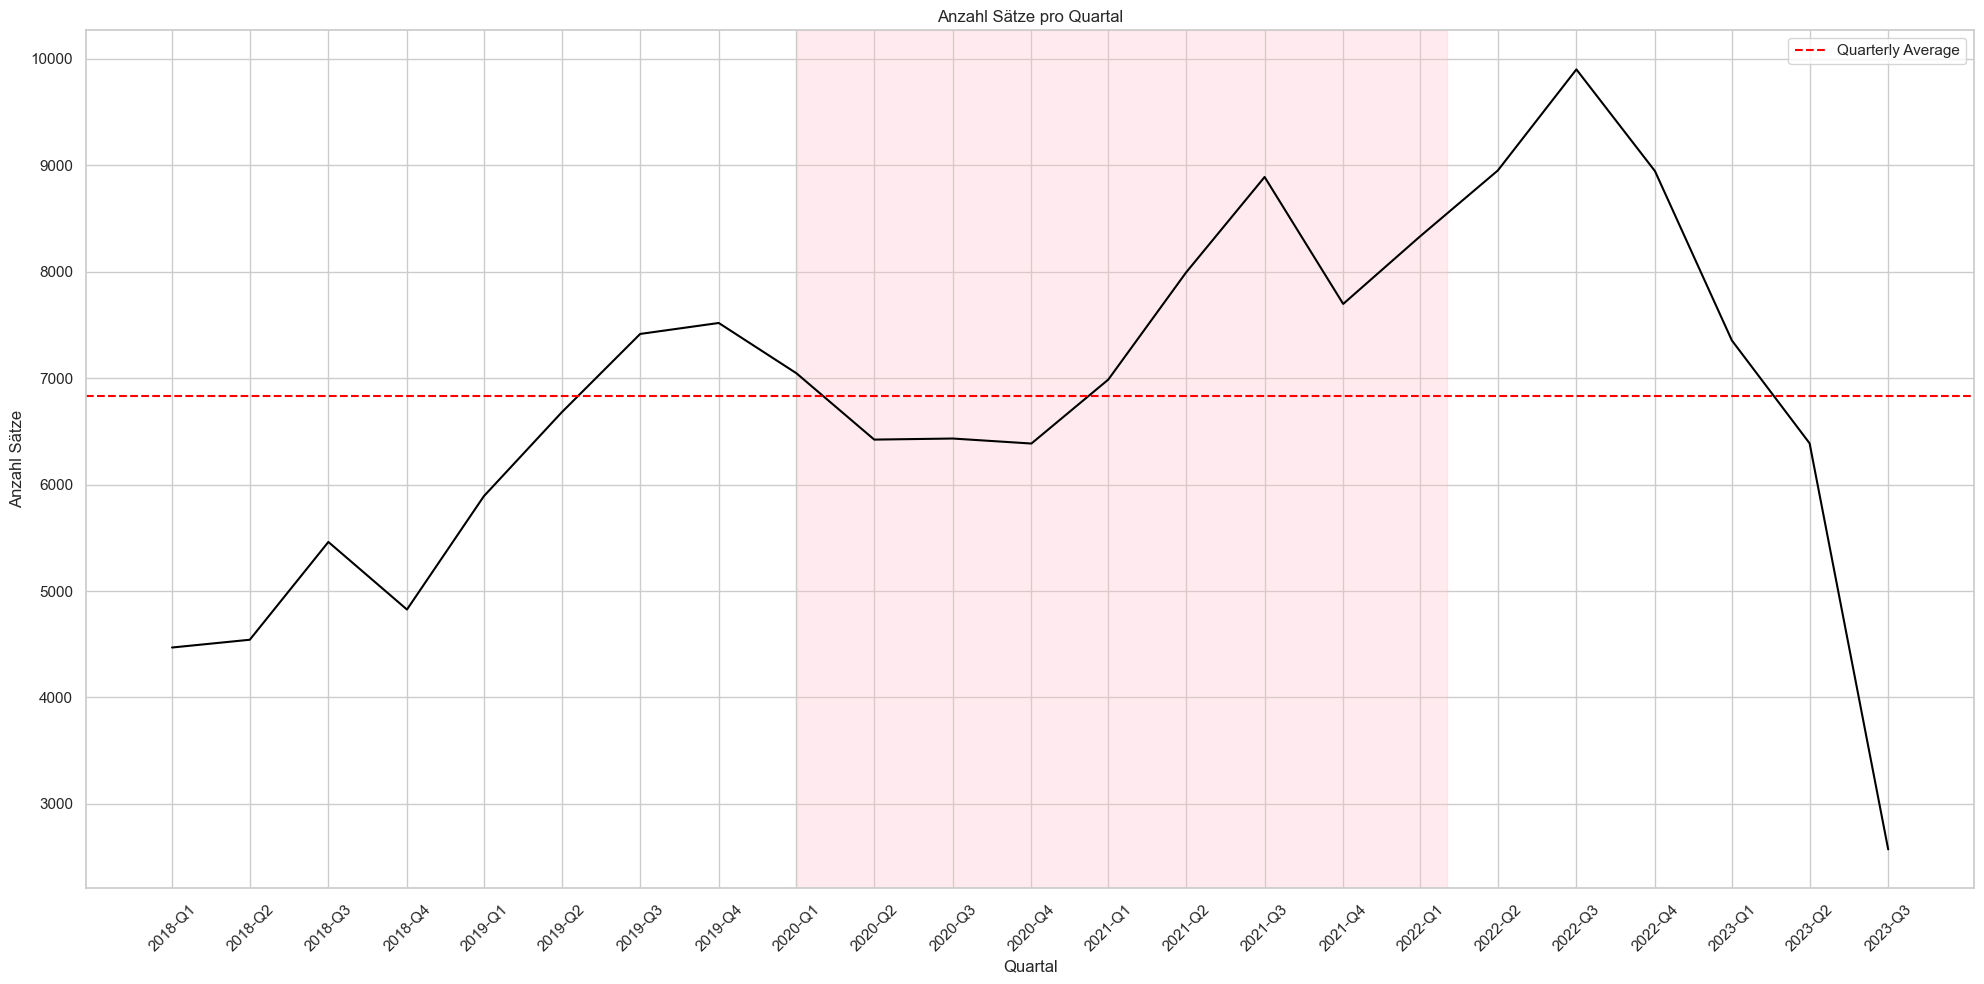

In [27]:
# Resample by quarter and count occurrences
quarterly_counts = df_h5.resample('Q', on='pubtime').size()
quarterly_average = quarterly_counts.mean()

# Plotting the counts
plt.figure(figsize=(20, 10))
plt.plot(quarterly_counts.index, quarterly_counts, color='black')

plt.axhline(y=quarterly_average, color='red', linestyle='--', label='Quarterly Average')

# Highlight a certain period (e.g., Covid period)
highlight_start = pd.Timestamp('04-01-2020')  # 'YYYY-MM-DD'
highlight_end = pd.Timestamp('05-01-2022')
plt.axvspan(highlight_start, highlight_end, color='pink', alpha=0.3)

plt.xlabel('Quartal')
plt.ylabel('Anzahl Sätze')
plt.title('Anzahl Sätze pro Quartal')

# Set x-axis ticks to display quarters with year and quarter number
quarter_ticks = [f"{x.strftime('%Y')}-Q{x.quarter}" for x in quarterly_counts.index]
plt.xticks(quarterly_counts.index, quarter_ticks, rotation=45)

plt.tight_layout()
plt.legend()
plt.show()


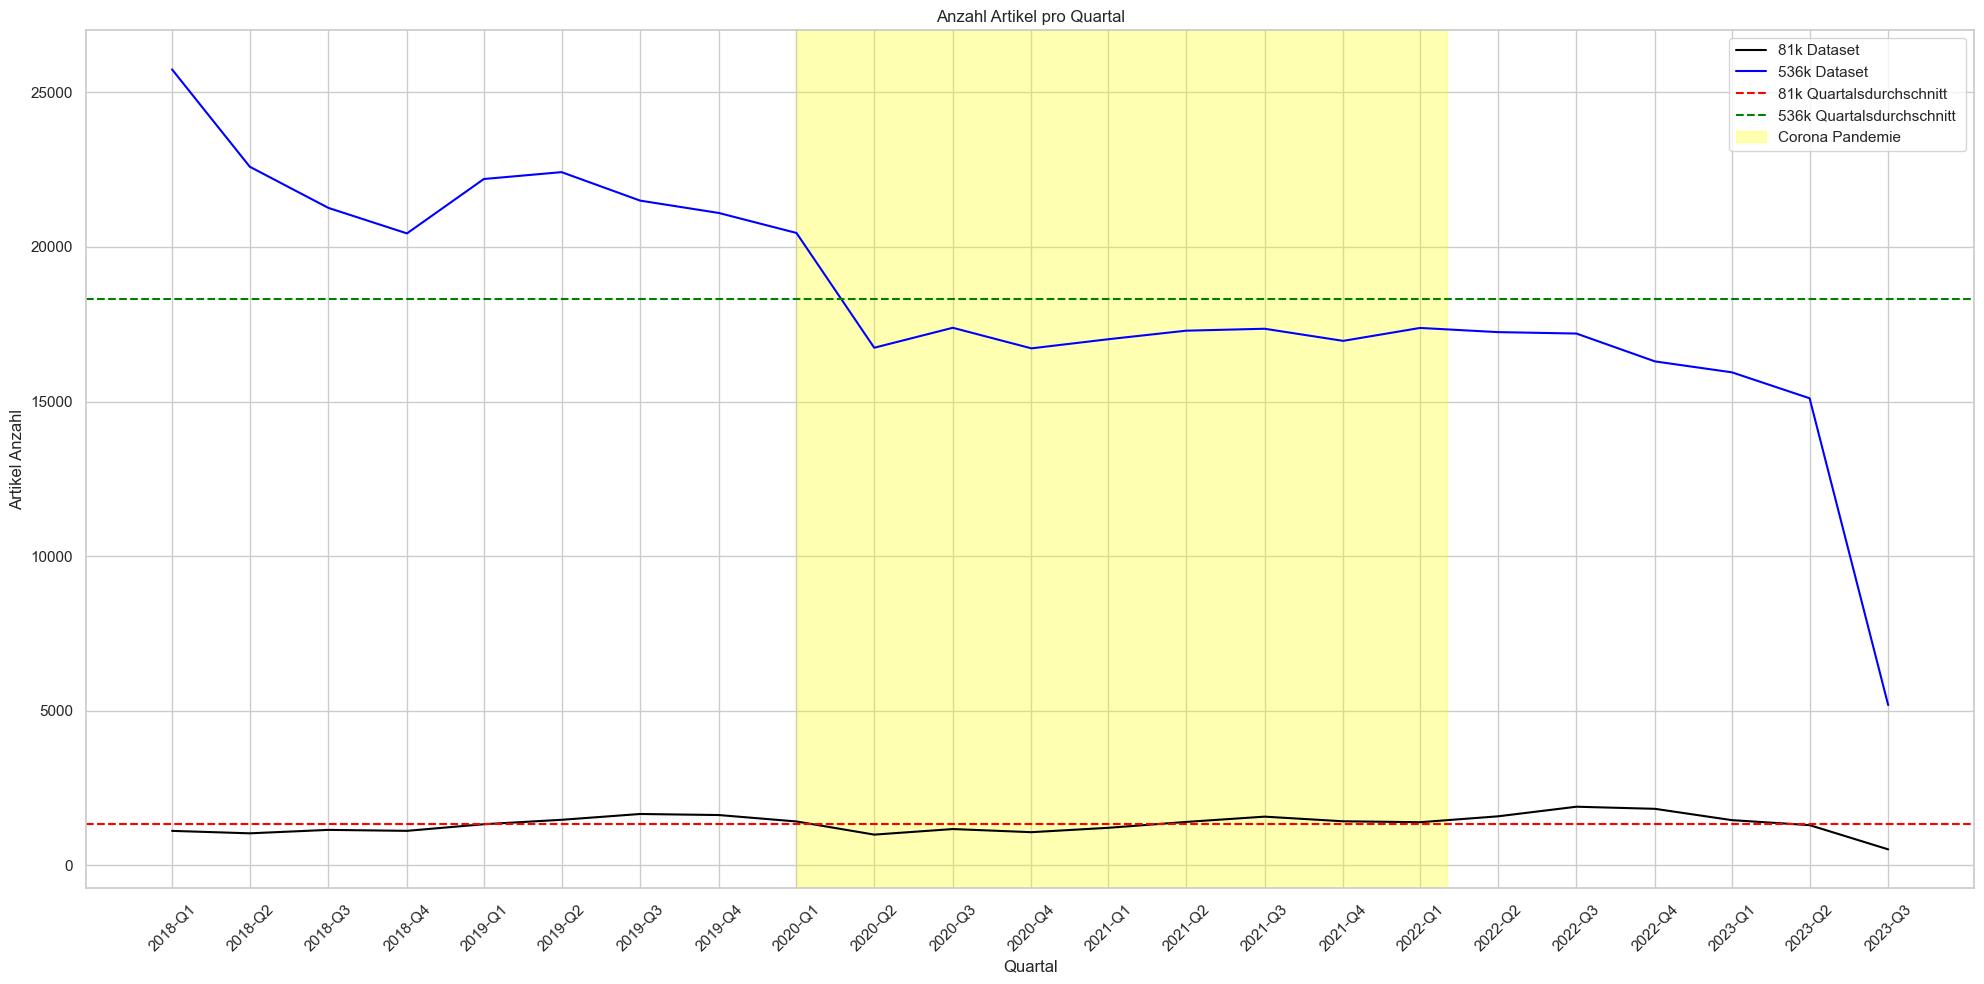

In [28]:
# Group by quarter and 'doc_id' and then count unique 'doc_id's for each quarter for the 81k dataset
quarterly_article_counts_81k = df_h5.groupby([pd.Grouper(key='pubtime', freq='Q'), 'doc_id']).size().groupby(level=0).count()

# Group by quarter and 'doc_id' and then count unique 'doc_id's for each quarter
quarterly_article_counts_536k = filtered_df_536k.groupby([pd.Grouper(key='pubtime', freq='Q'), 'id']).size().groupby(level=0).count()

# Covid period
highlight_start = pd.Timestamp('04-01-2020') # 'MM-DD-YYYY'
highlight_end = pd.Timestamp('05-01-2022')

plt.figure(figsize=(20, 10))

# Plotting the 81k dataset with unique article counts
plt.plot(quarterly_article_counts_81k.index, quarterly_article_counts_81k, color='black', label='81k Dataset')

# Plotting the 536k dataset with unique article counts
plt.plot(quarterly_article_counts_536k.index, quarterly_article_counts_536k, color='blue', label='536k Dataset')

# Add the average line for the 81k dataset with unique article counts
quarterly_average_81k = quarterly_article_counts_81k.mean()
plt.axhline(y=quarterly_average_81k, color='red', linestyle='--', label='81k Quartalsdurchschnitt')

# Optionally, calculate and plot the average line for the 536k dataset with unique article counts
quarterly_average_536k = quarterly_article_counts_536k.mean()
plt.axhline(y=quarterly_average_536k, color='green', linestyle='--', label='536k Quartalsdurchschnitt ')

# Highlighting the specified period
plt.axvspan(highlight_start, highlight_end, color='yellow', alpha=0.3, label='Corona Pandemie')

# Rest of the plotting code remains the same
plt.xlabel('Quartal')
plt.ylabel('Artikel Anzahl')
plt.title('Anzahl Artikel pro Quartal')
# Set x-axis ticks to display quarters with year and quarter number
quarter_ticks = [f"{x.strftime('%Y')}-Q{x.quarter}" for x in quarterly_counts.index]
plt.xticks(quarterly_counts.index, quarter_ticks, rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

### Ergebisse 
Wenn man in der obigen Grafik nur den 81k Quartalsdurchschnitt betrachtet, würde man behaupten, dass die Pandemie einen Einfluss auf die Publikation von Klimaartikel hatte. Aber die 536k-Kurve lässt darauf schliessen, dass die Anzahl Gesamtartikel entscheidend für die Veränderungen der 81k-Kurve sein könnte. Gründe dafür sind möglicherweise die Reduktion von Zeitungsartikel seit dem Start der Pandemie. Es ist uns unbekannt, ob dies mit der Pandamie oder der Swissdox Datenbank zusammenhängt.  
Der steile Abstieg beider Kurven im Q2 2023 ist für uns unklar. Es könnte sein, dass der Rückgang mit der Datensammlung auf Seiten der Swissdox@LiRI in Verbindung steht. 

# Fazit
Unsere Analyse der Schweizer Medienlandschaft im Kontext des Klimawandels und der COVID-19-Pandemie hat zu den folgenden Erkenntnissen geführt:

1. **Hypothese 1:** Die politische Ausrichtung einer Publikation korreliert nicht eindeutig mit der Anzahl von pro/contra-Stances. Das SRF zeigte einen höheren Anteil an pro-Stances im Vergleich zu den erwarteten Ergebnissen.

2. **Hypothese 2:** Meinungsartikel weisen stärkere Stances auf, insbesondere in negativer Hinsicht. Die Visualisierung und Tabellen bestätigten, dass Meinungsartikel tendenziell kontroverser sind.

3. **Hypothese 3:** Das SRF hat mehr neutrale Stances als pro/con-Stances, was unsere Annahme bestätigt.

4. **Hypothese 4:** Die Pandemie hatte keinen signifikanten Einfluss auf die Stances zu Klimafragen. Schwankungen in neutralen Stances könnten auf allgemeine Trends zurückzuführen sein.

5. **Hypothese 5:** Die Anzahl der Zeitungsartikel über das Klima änderte sich während der Pandemie nicht signifikant. Der Rückgang in Q2 2023 könnte auf Faktoren wie die Datensammlung oder andere, nicht spezifizierte Gründe zurückzuführen sein.

Insgesamt gibt die Analyse Einblicke in die Dynamik der Berichterstattung über Klimafragen in Schweizer Medien. Es ist wichtig zu beachten, dass die Ergebnisse kontextabhängig sind und durch Faktoren wie Datenqualität und spezifische Merkmale der untersuchten Publikationen beeinflusst werden können. Weitere Forschung könnte zusätzliche Perspektiven auf dieses Thema liefern.